In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})


In [8]:
import matplotlib.pyplot as plt

In [9]:
import pandas as pd, numpy as np, os, glob, re

# ---- exact file map (edit ONLY if a filename is clearly different)
files = {
    'Austria': 'Austria.ATX Historical Data.csv',
    'Belgium': 'Belgium.BEL 20 Historical Data.csv',
    'Croatia': 'Croatia.CROBEX Historical Data.csv',
    'Cyprus': 'Cyprus.Main Market Historical Data.csv',
    'Czech Republic': 'Czech Republic.PX Historical Data.csv',
    'Denmark': 'Denmark.OMX Copenhagen 20 Historical Data.csv',  # if you have an extra space before .csv, the fallback will find it
    'Finland': 'Finland.OMX Helsinki 25 Historical Data.csv',
    'France': 'France.CAC 40 Historical Data.csv',
    'Germany': 'Germany.DAX Historical Data.csv',
    'Greece': 'Greece.Athens General Composite Historical Data.csv',
    'Hungary': 'Hungary.Budapest SE Historical Data.csv',
    'Ireland': 'Ireland.ISEQ Overall Historical Data.csv',
    'Italy': 'Italy.FTSE MIB Historical Data.csv',
    'Netherlands': 'Netherlands.AEX Historical Data.csv',
    'Norway': 'Norway.Oslo OBX Historical Data.csv',
    'Poland': 'Poland.WIG20 Historical Data.csv',
    'Portugal': 'Portugal.PSI Historical Data.csv',
    'Romania': 'Romania.BET Historical Data.csv',
    'Slovakia': 'Slovakia.SAX Historical Data.csv',
    'Slovenia': 'Slovenia.Blue-Chip SBITOP Historical Data.csv',
    'Spain': 'Spain.IBEX 35 Historical Data.csv',
    'Sweden': 'Sweden.OMX Stockholm 30 Historical Data.csv',
    'Switzerland': 'Switzerland.SMI Historical Data.csv',
    'UK': 'UK.FTSE 100 Historical Data.csv'
}

def resolve_path(expected):
    """Return an existing path; if not exact, try fuzzy glob."""
    if os.path.exists(expected):
        return expected
    # fuzzy: ignore multiple spaces and match “Historical Data”
    base = expected.replace('.csv','').replace('  ',' ')
    token = re.sub(r'\s+', '*', base)   # allow flexible whitespace
    hits = glob.glob(f"*{token}*.csv")
    if hits:
        return sorted(hits, key=len)[0]
    raise FileNotFoundError(f"Could not find file close to: {expected}")

def _to_float(x):
    if pd.isna(x): return np.nan
    s = str(x).replace(',', '').strip()
    return np.nan if s in {'', '-'} else float(s)

def load_stock_csv(country, path_expected):
    path = resolve_path(path_expected)
    df = pd.read_csv(path)
    df.columns = [c.strip().lower() for c in df.columns]
    if 'date' not in df or 'price' not in df:
        raise ValueError(f"{path}: expected columns 'Date' and 'Price'. Got {df.columns}")
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['price'] = df['price'].apply(_to_float)
    df = df.sort_values('date')
    df['return'] = np.log(df['price'] / df['price'].shift(1))
    df['country'] = country
    return df[['country','date','price','return']].dropna(subset=['return'])

stock_panel = pd.concat([load_stock_csv(cty, fn) for cty, fn in files.items()], ignore_index=True)
print("✅ Stock panel:", stock_panel.shape)
stock_panel.head()

✅ Stock panel: (53212, 4)


,country,date,price,return
0,Austria,2017-01-03,2685.02,0.011266
1,Austria,2017-01-04,2682.64,-0.000887
2,Austria,2017-01-05,2696.30,0.005079
3,Austria,2017-01-09,2678.69,-0.006553
4,Austria,2017-01-10,2659.70,-0.007115


In [10]:
import pandas as pd

# Load raw data
cases_raw = pd.read_csv("daily-new-confirmed-covid-19-cases-per-million-people.csv")
ox_raw = pd.read_csv("covid_policy_tracker.csv")
vix_raw = pd.read_csv("CBOE Volatility Index Historical Data.csv")

# Quick look at each
print("🦠 COVID CASES")
display(cases_raw.head(3))
print("\n📊 STRINGENCY (OxCGRT)")
display(ox_raw.head(3))
print("\n⚡ VIX INDEX")
display(vix_raw.head(3))

🦠 COVID CASES


,Entity,Day,"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)"
0,Afghanistan,2020-01-09,0.0
1,Afghanistan,2020-01-10,0.0
2,Afghanistan,2020-01-11,0.0



📊 STRINGENCY (OxCGRT)


,countryname,countrycode,date,c1_school_closing,c1_flag,c2_workplace_closing,c2_flag,c3_cancel_public_events,c3_flag,c4_restrictions_on_gatherings,...,h5_investment_in_vaccines,m1_wildcard,confirmedcases,confirmeddeaths,stringencyindex,stringencyindexfordisplay,legacystringencyindex,legacystringencyindexfordisplay,iso_country,load_date
0,Aruba,ABW,2020-01-01,0.0,False,0.0,False,0.0,False,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,AW,2022-07-27 00:05:26
1,Aruba,ABW,2020-01-02,0.0,False,0.0,False,0.0,False,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,AW,2022-07-27 00:05:26
2,Aruba,ABW,2020-01-03,0.0,False,0.0,False,0.0,False,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,AW,2022-07-27 00:05:26



⚡ VIX INDEX


,Date,Price,Open,High,Low,Vol.,Change %
0,10/31/2025,17.44,16.43,18.54,15.96,NaN,3.13%
1,10/30/2025,16.91,16.26,17.41,15.73,NaN,-0.06%
2,10/29/2025,16.92,16.34,17.58,16.26,NaN,3.05%


In [11]:
# ===============================================================
# 🌍 CLEAN + ALIGN CONTROL VARIABLES (CASES, STRINGENCY, VIX)
# ===============================================================

import pandas as pd
import numpy as np

# ===============================================================
# STEP 1 – Country Setup
# ===============================================================
countries = sorted(stock_panel['country'].unique())

# Mapping between datasets (standardize to match stock data)
map_owid = {
    'United Kingdom': 'UK',
    'Czechia': 'Czech Republic'
}
map_ox = {
    'United Kingdom': 'UK',
    'Slovak Republic': 'Slovakia'
}

# ===============================================================
# STEP 2 – CLEAN COVID CASES (OWID)
# ===============================================================
cases = cases_raw.copy()
cases.rename(columns={'Entity': 'country', 'Day': 'date'}, inplace=True)
cases['country'] = cases['country'].replace(map_owid).str.strip()
cases['date'] = pd.to_datetime(cases['date'], errors='coerce')

# Detect the COVID cases column
col_cases = [c for c in cases.columns if 'confirmed' in c.lower()][0]
cases = cases[['country', 'date', col_cases]].rename(columns={col_cases: 'cases_pm'})

# Filter only target countries
cases_eu = cases[cases['country'].isin(countries)].dropna(subset=['date']).copy()

# Smooth with optional 7-day moving average
cases_eu = cases_eu.sort_values(['country', 'date'])
cases_eu['cases_pm'] = (
    cases_eu.groupby('country', group_keys=False)['cases_pm']
    .apply(lambda s: s.rolling(7, min_periods=1).mean())
)

print(f"✅ Cases cleaned: {cases_eu.shape}, countries: {cases_eu['country'].nunique()}")
display(cases_eu.head(3))

# ===============================================================
# STEP 3 – CLEAN STRINGENCY (OxCGRT)
# ===============================================================
def clean_oxcgrt(df, countries_target, map_ox):
    df = df.copy()
    df.rename(columns={'countryname': 'country'}, inplace=True)
    df['country'] = df['country'].replace(map_ox).str.strip()
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Identify correct stringency column
    cand = [c for c in df.columns if 'stringency' in c.lower() and 'legacy' not in c.lower()]
    pref = [c for c in cand if c.lower() in {'stringencyindex', 'stringencyindexfordisplay'}]
    scol = pref[0] if pref else (cand[0] if cand else None)
    if scol is None:
        raise ValueError("⚠️ No Stringency column found in OxCGRT file.")

    out = df[['country', 'date', scol]].rename(columns={scol: 'stringency'})
    out = out[out['country'].isin(countries_target)].dropna(subset=['date'])
    print(f"✅ OxCGRT cleaned rows: {out.shape[0]}, countries: {out['country'].nunique()}, "
          f"| %NaT dates: {out['date'].isna().mean():.3f}")
    return out

ox_eu = clean_oxcgrt(ox_raw, countries, map_ox)
display(ox_eu.head(3))

# ===============================================================
# STEP 4 – CLEAN VIX (GLOBAL)
# ===============================================================
vix = vix_raw.copy()
vix.columns = [c.strip().capitalize() for c in vix.columns]
vix['Date'] = pd.to_datetime(vix['Date'], errors='coerce')
vix = vix.dropna(subset=['Date']).rename(columns={'Date': 'date', 'Price': 'vix'})
vix = vix[['date', 'vix']].copy()
print(f"✅ VIX cleaned: {vix.shape}")
display(vix.head(3))

# ===============================================================
# STEP 5 – CHECK COVERAGE CONSISTENCY
# ===============================================================
stock_countries = set(stock_panel['country'])
cases_countries = set(cases_eu['country'])
ox_countries = set(ox_eu['country'])

print("\n🌐 Coverage summary")
print("Countries in stock panel:", len(stock_countries))
print("Countries in cases:", len(cases_countries))
print("Countries in stringency:", len(ox_countries))
print("\nMissing from CASES:", sorted(stock_countries - cases_countries))
print("Missing from STRINGENCY:", sorted(stock_countries - ox_countries))


✅ Cases cleaned: (47718, 3), countries: 24


,country,date,cases_pm
31350,Austria,2020-01-09,0.0
31351,Austria,2020-01-10,0.0
31352,Austria,2020-01-11,0.0


✅ OxCGRT cleaned rows: 26264, countries: 24, | %NaT dates: 0.000


,country,date,stringency
12080,Austria,2020-01-01,0.0
12081,Austria,2020-01-02,0.0
12082,Austria,2020-01-03,0.0


✅ VIX cleaned: (2259, 2)


,date,vix
0,2025-10-31,17.44
1,2025-10-30,16.91
2,2025-10-29,16.92



🌐 Coverage summary
Countries in stock panel: 24
Countries in cases: 24
Countries in stringency: 24

Missing from CASES: []
Missing from STRINGENCY: []


In [12]:
# 📈 FINAL MERGE: BUILD COMPLETE PANEL
# ===============================================================

# Merge COVID cases and stringency by country-date
panel = (
    stock_panel
    .merge(cases_eu, on=['country', 'date'], how='left')
    .merge(ox_eu, on=['country', 'date'], how='left')
    .merge(vix, on='date', how='left')  # VIX is global, only date merge
)

# Sort for consistency
panel = panel.sort_values(['country', 'date']).reset_index(drop=True)

# Summary
print("✅ Final merged panel:", panel.shape)
print("Columns:", panel.columns.tolist())
print("Date range:", panel['date'].min(), "→", panel['date'].max())
print("Countries:", panel['country'].nunique())

# Quick sanity check
display(panel.head(5))

✅ Final merged panel: (55804, 7)
Columns: ['country', 'date', 'price', 'return', 'cases_pm', 'stringency', 'vix']
Date range: 2017-01-03 00:00:00 → 2025-10-31 00:00:00
Countries: 24


,country,date,price,return,cases_pm,stringency,vix
0,Austria,2017-01-03,2685.02,0.011266,NaN,NaN,12.85
1,Austria,2017-01-04,2682.64,-0.000887,NaN,NaN,11.85
2,Austria,2017-01-05,2696.30,0.005079,NaN,NaN,11.67
3,Austria,2017-01-09,2678.69,-0.006553,NaN,NaN,11.56
4,Austria,2017-01-10,2659.70,-0.007115,NaN,NaN,11.49


In [13]:
print(panel.columns.tolist())


['country', 'date', 'price', 'return', 'cases_pm', 'stringency', 'vix']


In [14]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity on returns (should be stationary)
for c in sorted(panel['country'].unique()):
    p = adfuller(panel.loc[panel['country']==c, 'return'].dropna())[1]
    print(f"{c:15s}  ADF p-value = {p:.3f}")

Austria          ADF p-value = 0.000
Belgium          ADF p-value = 0.000
Croatia          ADF p-value = 0.000
Cyprus           ADF p-value = 0.000
Czech Republic   ADF p-value = 0.000
Denmark          ADF p-value = 0.000
Finland          ADF p-value = 0.000
France           ADF p-value = 0.000
Germany          ADF p-value = 0.000
Greece           ADF p-value = 0.000
Hungary          ADF p-value = 0.000
Ireland          ADF p-value = 0.000
Italy            ADF p-value = 0.000
Netherlands      ADF p-value = 0.000
Norway           ADF p-value = 0.000
Poland           ADF p-value = 0.000
Portugal         ADF p-value = 0.000
Romania          ADF p-value = 0.000
Slovakia         ADF p-value = 0.000
Slovenia         ADF p-value = 0.000
Spain            ADF p-value = 0.000
Sweden           ADF p-value = 0.000
Switzerland      ADF p-value = 0.000
UK               ADF p-value = 0.000


In [15]:
# ============================================================
# 🧩 Sanity check: treatment groups and stringency levels (+ scores)
# ============================================================

# 1️⃣ Define event date and +7 days window
EVENT_DATE = pd.Timestamp('2020-03-11')
t_plus_7 = EVENT_DATE + pd.Timedelta(days=7)

# 2️⃣ Compute average stringency per country (7 days after event date)
strg_t7 = (
    panel.loc[panel['date'] == t_plus_7, ['country', 'stringency']]
    .groupby('country', as_index=False)
    .agg({'stringency': 'mean'})
)

# 3️⃣ Create treatment classification directly here
# Countries above the median stringency are Treated = 1, below = 0
median_t7 = strg_t7['stringency'].median()
strg_t7['treated'] = (strg_t7['stringency'] >= median_t7).astype(int)

# 4️⃣ Display summary information
print(f"🗓️ Event date: {EVENT_DATE.date()}, 7-days after: {t_plus_7.date()}")
print(f"📊 Median stringency @ +7 days = {median_t7:.2f}\n")
print("Treated (1) = above median stringency, Control (0) = below median\n")

# 5️⃣ Show the classification table
display(strg_t7.sort_values('stringency', ascending=False))
print("\nCounts per group:\n", strg_t7['treated'].value_counts())

# 6️⃣ Add the 'treated' column back into the main panel
panel = panel.merge(strg_t7[['country', 'treated']], on='country', how='left')
print("✅ 'treated' column added to main panel.")


🗓️ Event date: 2020-03-11, 7-days after: 2020-03-18
📊 Median stringency @ +7 days = 63.42

Treated (1) = above median stringency, Control (0) = below median



,country,stringency,treated
7,France,87.960,1
12,Italy,82.410,1
0,Austria,81.480,1
4,Czech Republic,79.630,1
18,Slovakia,75.000,1
22,Switzerland,73.150,1
1,Belgium,73.150,1
5,Denmark,72.220,1
20,Spain,71.760,1
6,Finland,68.520,1



Counts per group:
 treated
1    12
0    12
Name: count, dtype: int64
✅ 'treated' column added to main panel.


In [16]:
# ============================================================
# 🧹 Clean up duplicate 'treated' columns safely
# ============================================================

# Find any columns that start with 'treated_'
treated_cols = [c for c in panel.columns if c.startswith('treated_')]
print("Duplicate treated columns found:", treated_cols)

if len(treated_cols) > 0:
    # ✅ Combine all 'treated_*' columns into one clean 'treated' column
    panel['treated'] = panel[treated_cols].bfill(axis=1).iloc[:, 0]
    panel['treated'] = panel['treated'].astype(int)

    # 🧽 Drop extra 'treated_*' columns
    panel = panel.drop(columns=treated_cols)
    print(f"🧹 Removed {len(treated_cols)} duplicate treated columns.")
else:
    # No duplicate columns → ensure treated is numeric (just in case)
    print("✅ No duplicate treated columns detected. Keeping existing 'treated' column.")
    panel['treated'] = panel['treated'].astype(int)

# ✅ Verify result
print("\n🔎 Sanity check: unique treated assignments per country")
print(panel[['country', 'treated']].drop_duplicates().sort_values('country').head(10))

print("\n📊 Value counts:")
print(panel['treated'].value_counts())


Duplicate treated columns found: []
✅ No duplicate treated columns detected. Keeping existing 'treated' column.

🔎 Sanity check: unique treated assignments per country
              country  treated
0             Austria        1
2229          Belgium        1
4490          Croatia        0
6686           Cyprus        0
8855   Czech Republic        1
11069         Denmark        1
13278         Finland        1
15498          France        1
17759         Germany        0
20001          Greece        1

📊 Value counts:
treated
0    29250
1    26554
Name: count, dtype: int64


In [17]:
# ============================================================
# 🕒 Compute 'event_time' in days relative to WHO declaration
# ============================================================

EVENT_DATE = pd.Timestamp('2020-03-11')  # same event date as before
panel['event_time'] = (panel['date'] - EVENT_DATE).dt.days

# Verify it exists
print(panel[['country', 'date', 'event_time']].head())


   country       date  event_time
0  Austria 2017-01-03       -1163
1  Austria 2017-01-04       -1162
2  Austria 2017-01-05       -1161
3  Austria 2017-01-09       -1157
4  Austria 2017-01-10       -1156


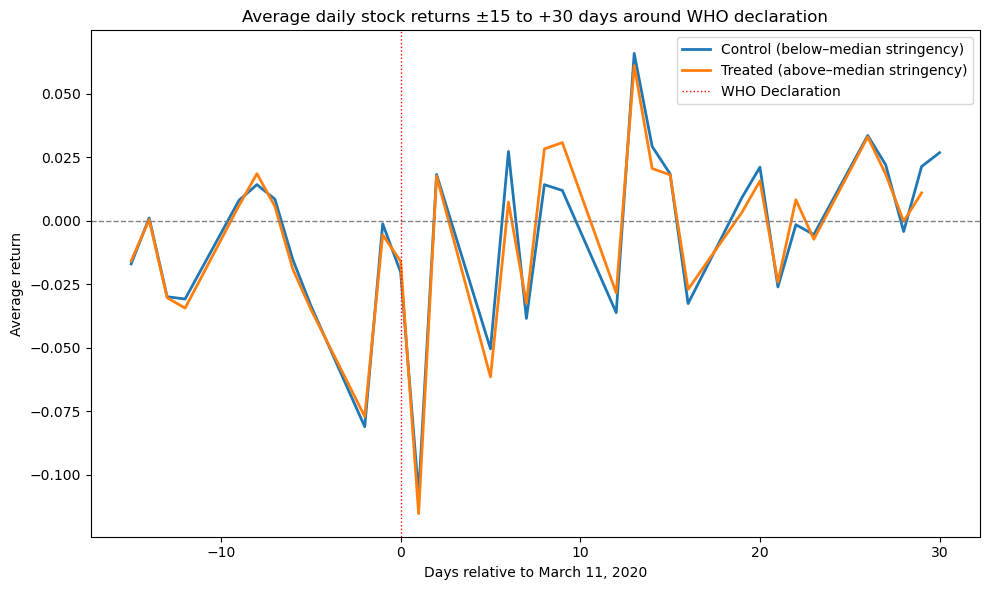

In [18]:
# ============================================================
# 📈 Descriptive pre-trend visualization (focused ±15 to +30 days)
# ============================================================

import matplotlib.pyplot as plt

# Define your event window
EVENT_DATE = pd.Timestamp('2020-03-11')
panel['event_time'] = (panel['date'] - EVENT_DATE).dt.days

# Keep only [-15, +30] days around WHO declaration
panel_window = panel.query("event_time >= -15 and event_time <= 30")

# Compute average returns by treatment group and event time
avg_paths = (
    panel_window
    .groupby(['event_time', 'treated'])['return']
    .mean()
    .reset_index()
)

# Label groups for legend
avg_paths['group'] = avg_paths['treated'].map({
    1: 'Treated (above–median stringency)',
    0: 'Control (below–median stringency)'
})

# Plot
plt.figure(figsize=(10,6))
for g in avg_paths['group'].unique():
    sub = avg_paths[avg_paths['group'] == g]
    plt.plot(sub['event_time'], sub['return'], label=g, lw=2)

# Add event and reference lines
plt.axvline(0, color='red', ls=':', lw=1, label='WHO Declaration')
plt.axhline(0, color='gray', lw=1, ls='--')

# Aesthetics
plt.title('Average daily stock returns ±15 to +30 days around WHO declaration')
plt.xlabel('Days relative to March 11, 2020')
plt.ylabel('Average return')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# ===============================================================
# 📊 Event-study (binned) TWFE + two-way clustered SE
#     - runs regression
#     - prints summary
#     - Wald test for pre-trends
#     - event-time plot with 95% CIs
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from scipy.stats import chi2

# ---- 0) Minimal checks -------------------------------------------------------
assert {'country','date','return','treated'}.issubset(panel.columns), \
    "panel must have columns: country, date, return, treated"
panel['date'] = pd.to_datetime(panel['date'])
EVENT_DATE = pd.Timestamp('2020-03-11')

# Ensure event_time exists (or recompute safely)
if 'event_time' not in panel.columns:
    panel['event_time'] = (panel['date'] - EVENT_DATE).dt.days

# ---- 1) Window + binning -----------------------------------------------------
WINDOW_MIN, WINDOW_MAX = -30, 60
df = panel[(panel['event_time'] >= WINDOW_MIN) & (panel['event_time'] <= WINDOW_MAX)].copy()

def bin_k(k: int):
    # Angrist–Pischke style binning to stabilize inference
    if k <= -15: return 'G_pre15'   # all far leads
    if k >= 30:  return 'G_post30'  # all far lags
    if k == -1:  return None        # baseline
    return f'G_{k}'

df['G_label'] = df['event_time'].apply(bin_k)

# Interacted dummies: 1{G_label} × treated
G = pd.get_dummies(df['G_label'])
G = G.mul(df['treated'].values, axis=0)
G = G.loc[:, (G != 0).any(axis=0)]   # drop empty columns (no variation)

# ---- 2) TWFE regression with two-way clustering ------------------------------
df = df.sort_values(['country','date']).set_index(['country','date'])
y = df['return']
G.index = df.index

clusters = pd.DataFrame({
    'country': G.index.get_level_values(0),
    'date':    G.index.get_level_values(1)
}, index=G.index)

mod = PanelOLS(y, G, entity_effects=True, time_effects=True, drop_absorbed=True)
res = mod.fit(cov_type='clustered', clusters=clusters)

print(res.summary)


# ======================================================
# 🧾 Clean, readable event-study coefficient table
# ======================================================

import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Extract parameter estimates, confidence intervals, and p-values
est = res.params
ci = res.conf_int()
pvals = res.pvalues

# Detect CI column names dynamically (some versions use 0/1, others 'lower'/'upper')
if isinstance(ci.columns[0], str):
    lower_col, upper_col = ci.columns[0], ci.columns[1]
else:
    lower_col, upper_col = 0, 1

# Build tidy DataFrame
rows = []
for name in est.index:
    if not name.startswith('G_'):
        continue

    label = name.replace('G_', '')

    if label == 'pre15':
        k = -15
        label = '≤ -15 days (binned)'
    elif label == 'post30':
        k = 30
        label = '≥ +30 days (binned)'
    else:
        try:
            k = int(label)
            label = f"{k:+d} days"
        except ValueError:
            continue

    rows.append({
        'Event time': label,
        'k': k,
        'Coef (β̂ₖ)': est[name],
        'CI lower': ci.loc[name, lower_col],
        'CI upper': ci.loc[name, upper_col],
        'p-value': pvals[name]
    })

table = pd.DataFrame(rows).sort_values('k').reset_index(drop=True)

# Add significance stars
def star(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.10:
        return '*'
    else:
        return ''

table['Signif.'] = table['p-value'].apply(star)

# Format nicely
table['Coef (β̂ₖ)'] = table['Coef (β̂ₖ)'].map('{:.4f}'.format)
table['CI lower'] = table['CI lower'].map('{:.4f}'.format)
table['CI upper'] = table['CI upper'].map('{:.4f}'.format)
table['p-value'] = table['p-value'].map('{:.4f}'.format)

# Reorder and display
table = table[['Event time', 'Coef (β̂ₖ)', 'CI lower', 'CI upper', 'p-value', 'Signif.']]
display(HTML(table.to_html(index=False, justify='center')))

# Optional: save to CSV for your appendix/report
table.to_csv('clean_event_study_table.csv', index=False)
print("✅ Clean table saved as 'clean_event_study_table.csv'")


# ===============================================================
# 3️⃣ Parallel-trends Wald test (safe + fixed)
# ===============================================================

param_names = res.params.index.tolist()
pre_params = []

for p in param_names:
    if p == 'G_pre15':
        pre_params.append(p)
    elif p.startswith('G_'):
        token = p.split('_', 1)[1]
        try:
            k = int(token)  # will fail for post30
            if k < 0:
                pre_params.append(p)
        except ValueError:
            continue  # skip non-numeric labels like 'post30'

if len(pre_params) == 0:
    print("\n[Note] No pre-treatment parameters remained; cannot run a pre-trend test.")
else:
    beta = res.params.loc[param_names].values
    V    = res.cov.loc[param_names, param_names].values

    idx = [param_names.index(p) for p in pre_params]
    R = np.zeros((len(pre_params), len(param_names)))
    for r, i in enumerate(idx):
        R[r, i] = 1.0

    RVR = R @ V @ R.T
    RVR_pinv = np.linalg.pinv(RVR)
    W = float((R @ beta).T @ RVR_pinv @ (R @ beta))
    W = max(0.0, W)
    pval = 1.0 - chi2.cdf(W, len(pre_params))

    print("\n=== Parallel Trends Wald Test (binned) ===")
    print(f"Chi-square({len(pre_params)}) = {W:.3f},  p-value = {pval:.4g}")



                          PanelOLS Estimation Summary                           
Dep. Variable:                 return   R-squared:                        0.0341
Estimator:                   PanelOLS   R-squared (Between):             -1.3933
No. Observations:                1721   R-squared (Within):               0.0017
Date:                Thu, Nov 06 2025   R-squared (Overall):             -0.0206
Time:                        13:38:30   Log-likelihood                    4900.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.7132
Entities:                          24   P-value                           0.0073
Avg Obs:                       71.708   Distribution:                 F(33,1600)
Min Obs:                       56.000                                           
Max Obs:                       310.00   F-statistic (robust):            -8.7616
                            

/opt/anaconda3/lib/python3.12/site-packages/linearmodels/panel/results.py:88: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Event time,Coef (β̂ₖ),CI lower,CI upper,p-value,Signif.
≤ -15 days (binned),0.0042,0.0025,0.0060,0.0000,***
-14 days,0.0037,-0.0072,0.0146,0.5052,
-13 days,0.0039,-0.0006,0.0085,0.0856,*
-12 days,0.0008,-0.0097,0.0112,0.8877,
-9 days,0.0023,nan,nan,nan,
-8 days,0.0086,nan,nan,nan,
-7 days,0.0015,-0.0021,0.0051,0.4188,
-6 days,0.0006,-0.0105,0.0117,0.9156,
-5 days,0.0029,-0.0060,0.0118,0.5231,
-2 days,0.0084,-0.0058,0.0225,0.2463,


✅ Clean table saved as 'clean_event_study_table.csv'

=== Parallel Trends Wald Test (binned) ===
Chi-square(10) = 0.000,  p-value = 1


/opt/anaconda3/lib/python3.12/site-packages/linearmodels/panel/results.py:88: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Confidence interval columns: ['lower', 'upper']


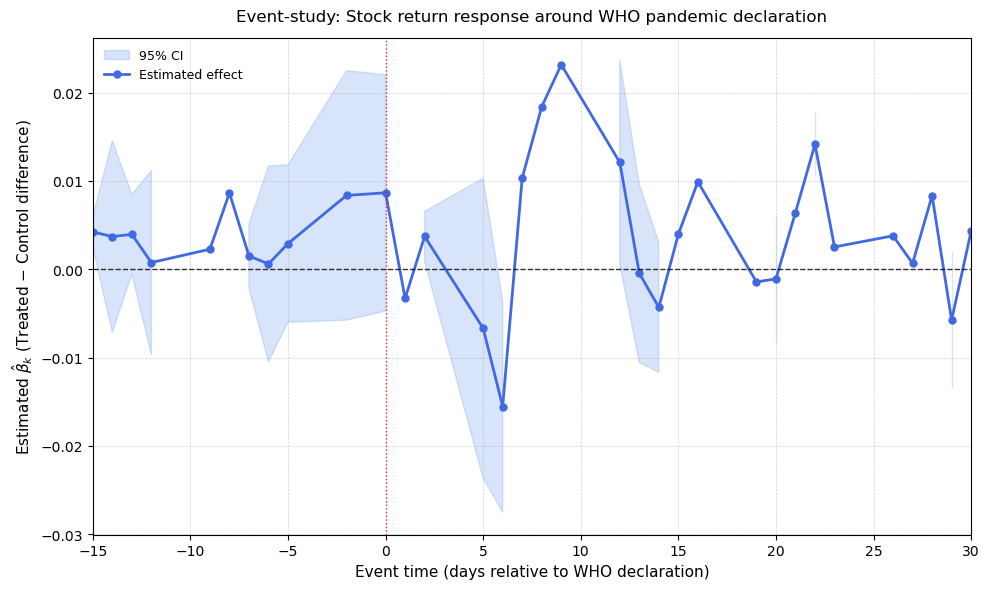

In [20]:
import numpy as np
import pandas as pd
import re

# --- Build plot_df safely from PanelOLS results ---
# assuming your regression result is stored in variable "res"

ci = res.conf_int()
est = res.params

# Figure out what the CI columns are called
print("Confidence interval columns:", list(ci.columns))

rows = []
for name, beta in est.items():
    if name == 'G_pre15':
        k = -15
        lo = ci.loc[name].iloc[0] if name in ci.index else np.nan
        hi = ci.loc[name].iloc[1] if name in ci.index else np.nan
        label = '≤ -15 days (binned)'
        rows.append({'k': k, 'beta': beta, 'lo': lo, 'hi': hi, 'label': label})
    elif name == 'G_post30':
        k = 30
        lo = ci.loc[name].iloc[0] if name in ci.index else np.nan
        hi = ci.loc[name].iloc[1] if name in ci.index else np.nan
        label = '≥ +30 days (binned)'
        rows.append({'k': k, 'beta': beta, 'lo': lo, 'hi': hi, 'label': label})
    elif name.startswith('G_'):
        token = name.split('_', 1)[1]
        try:
            k = int(token)
        except ValueError:
            continue
        lo = ci.loc[name].iloc[0] if name in ci.index else np.nan
        hi = ci.loc[name].iloc[1] if name in ci.index else np.nan
        label = f'{k:+d} days'
        rows.append({'k': k, 'beta': beta, 'lo': lo, 'hi': hi, 'label': label})

plot_df = pd.DataFrame(rows).sort_values('k').reset_index(drop=True)



# Optional: save the tidy table you like
# plot_df.to_csv('event_study_coeffs_tidy.csv', index=False)

# --- 2) Plot: limit to [-15, 30] as in your reference figure ---
mask = (plot_df['k'] >= -15) & (plot_df['k'] <= 30)
dfp = plot_df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(10, 6))

# 95% CI (will gracefully handle NaN)
ax.fill_between(dfp['k'], dfp['lo'], dfp['hi'], color='cornflowerblue', alpha=0.25, label='95% CI')

# point estimates
ax.plot(dfp['k'], dfp['beta'], color='royalblue', marker='o', markersize=5, lw=2, label='Estimated effect')

# reference lines
ax.axhline(0, color='black', lw=1, ls='--', alpha=0.8)
ax.axvline(0, color='red', lw=1, ls=':', alpha=0.8)

# labels & cosmetics
ax.set_xlabel('Event time (days relative to WHO declaration)', fontsize=11)
ax.set_ylabel(r'Estimated $\hat{\beta}_k$ (Treated − Control difference)', fontsize=11)
ax.set_title('Event-study: Stock return response around WHO pandemic declaration', fontsize=12, pad=12)
ax.set_xlim(-15, 30)
ax.set_xticks(range(-15, 31, 5))
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
ax.legend(frameon=False, fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()


In [32]:
panel.columns.tolist()


['country',
 'date',
 'price',
 'return',
 'cases_pm',
 'stringency',
 'vix',
 'treated',
 'event_time']

                          PanelOLS Estimation Summary                           
Dep. Variable:                 return   R-squared:                        0.0436
Estimator:                   PanelOLS   R-squared (Between):             -0.3700
No. Observations:                 640   R-squared (Within):               0.0129
Date:                Thu, Nov 06 2025   R-squared (Overall):             -0.0114
Time:                        13:56:13   Log-likelihood                    1651.9
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.1846
Entities:                          24   P-value                           0.2549
Avg Obs:                       26.667   Distribution:                  F(22,572)
Min Obs:                       21.000                                           
Max Obs:                       115.00   F-statistic (robust):             0.8247
                            

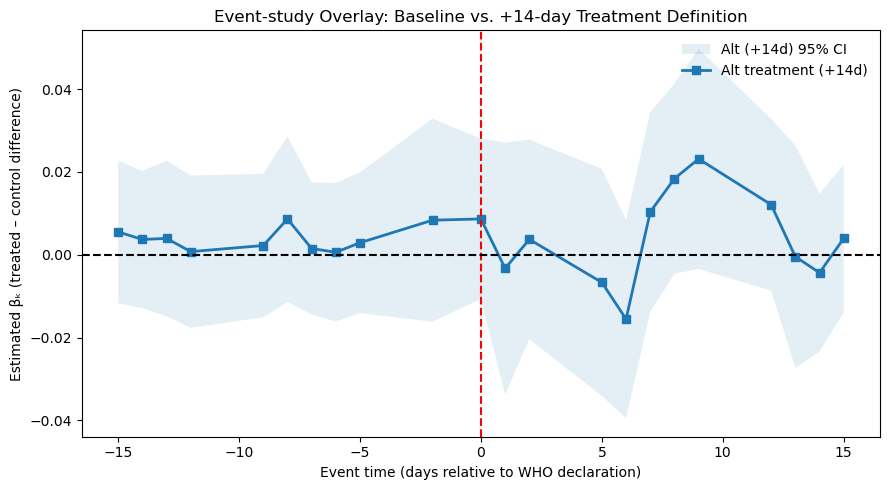

In [40]:
# ===== Robustness: +14-day treatment, fast & stable (no formula) =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

# --- 1) Start from your main panel and create shifted treatment
panel_alt = panel.copy()
panel_alt['treated_alt'] = panel_alt.groupby('country')['treated'].shift(14)
panel_alt = panel_alt.dropna(subset=['treated_alt']).copy()

# --- 2) Set the panel index that PanelOLS expects
panel_alt = panel_alt.set_index(['country', 'date'])

# --- 3) Restrict to a light event window (speeds up & reduces collinearity)
win_lo, win_hi = -15, 15
panel_alt = panel_alt.loc[(panel_alt['event_time'] >= win_lo) &
                          (panel_alt['event_time'] <= win_hi)].copy()

# --- 4) Build event-time dummies and interact with treated_alt
# reference period (omit to avoid perfect collinearity)
ref_k = -1  # change if you prefer another reference
k = panel_alt['event_time'].astype(int)
D = pd.get_dummies(k, prefix='k', drop_first=False)

if f'k_{ref_k}' in D.columns:
    D = D.drop(columns=[f'k_{ref_k}'])

# interaction: 1{k=t} * treated_alt
X = D.mul(panel_alt['treated_alt'].values, axis=0)

# dependent variable (use your real column name, no formula parsing issues)
y = panel_alt['return']

# --- 5) Estimate PanelOLS with FE (robust SE to avoid singular covariance)
mod_alt = PanelOLS(y, X, entity_effects=True, time_effects=True)
res_alt = mod_alt.fit(cov_type='robust')

# --- 6) Tidy coefficients for plotting
coef_alt = res_alt.params
ci_alt = res_alt.conf_int()

alt_df = (
    pd.DataFrame({
        'k': [int(c.split('k_')[1]) for c in coef_alt.index],
        'beta': coef_alt.values,
        'lo': ci_alt.iloc[:, 0].values,
        'hi': ci_alt.iloc[:, 1].values
    })
    .sort_values('k')
)

print(res_alt.summary)

# ===== Overlay with your baseline (if `res` from your baseline model is in memory) =====
def tidy_from_formula(res):
    idx = res.params.filter(like='C(event_time)').index
    if len(idx) == 0:
        return None
    coef = res.params.loc[idx]
    ci = res.conf_int().loc[idx]
    k_vals = [int(s.split('T.')[1].split('.')[0]) for s in idx]
    return (
        pd.DataFrame({
            'k': k_vals,
            'beta': coef.values,
            'lo': ci.iloc[:, 0].values,
            'hi': ci.iloc[:, 1].values
        })
        .sort_values('k')
    )

base_df = tidy_from_formula(res) if 'res' in locals() else None  # your baseline PanelOLS.from_formula result

# ===== Plot: overlay (baseline vs +14 days) =====
plt.figure(figsize=(9,5))

# baseline (if available)
if base_df is not None:
    plt.fill_between(base_df.k, base_df.lo, base_df.hi, alpha=0.12, label='Baseline 95% CI')
    plt.plot(base_df.k, base_df.beta, marker='o', linewidth=2, label='Baseline')

# alternative (+14d)
plt.fill_between(alt_df.k, alt_df.lo, alt_df.hi, alpha=0.12, label='Alt (+14d) 95% CI')
plt.plot(alt_df.k, alt_df.beta, marker='s', linewidth=2, label='Alt treatment (+14d)')

plt.axvline(0, linestyle='--', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Event time (days relative to WHO declaration)")
plt.ylabel("Estimated βₖ (treated – control difference)")
plt.title("Event-study Overlay: Baseline vs. +14-day Treatment Definition")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

